# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [77]:
%pip install pandas
%pip install xlrd
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using 

In [78]:
#question 1

import pandas as pd
df = pd.read_excel("../data/GSAF5.xls")
#turned excel into csv called sharks2.csv
df.to_csv("data/sharks2.csv", index = False)

In [79]:
#question 2

#dropping columns with no data
df_clean = df.drop(df.columns[[15, 16, 17, 18, 19, 20, 21, 22]], axis=1)
df_clean.to_csv("data/sharks3.csv", index = False)

In [80]:
#question 3

#clean year variable
df_clean["Year"]=df_clean["Year"].fillna(0).astype(int) #fill NA with 0 and convert to int
df_clean.to_csv("data/sharks3.csv", index = False)
#pd.read_csv("data/sharks3.csv")

df_clean["Year"].dtype #verify int not float

df_years = df_clean["Year"].value_counts().sort_index() #frequency table
df_years.to_csv("data/Shark_Years") #save to a csv file to read easily
df_years.head()

Year
0       131
5         1
77        1
1000      1
1500      1
Name: count, dtype: int64

- Firstly, the year variable was initially a float. I converted this to an integer so that there were no decimal points, any NA values were filled with int 0.
- In some records, there are ranges of years e.g. 1845-1853 in the time column and 0 in the year column. Overall, the data is incredibly inconsistent. 
- When looking at the Shark_years file, I can see that attacks are increasing over the years. This is probably also due to the fact that documentation of attacks have gotten better in modern times. There are 131 values that have 0; meaning the year is known or could not be converted to an integer. Around the late 1800s, the number of attacks seem to consistently be in the double digits and by 2005, the number of attacks are regularly in the triple digits. 

Text(0.5, 1.0, 'Age Distribution')

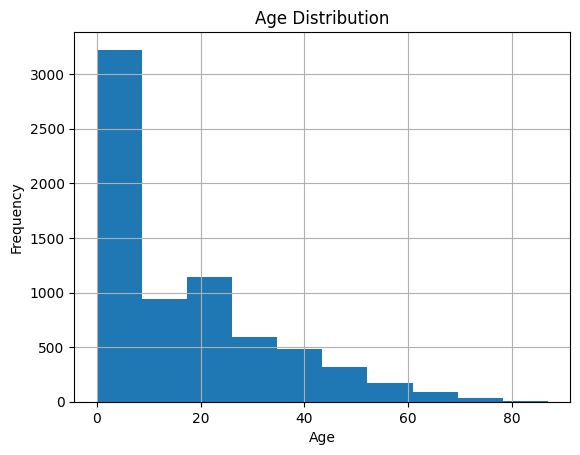

In [82]:
#question 4
import matplotlib.pyplot as plt

df_ages = pd.to_numeric(df_clean["Age"], errors="coerce")
df_ages=df_ages.fillna(0).astype(int) #fill NA with 0 and convert to int
df_ages.head()
df_ages.hist()

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

In [90]:
#question 5
df_clean["Sex"] = df_clean["Sex"].str.strip() #get rid of whitespace
df_clean["Sex"] = df_clean["Sex"].str.upper() #all uppercase
all_counts = df_clean["Sex"].value_counts(normalize=True)
all_counts.head()

#df_male.head()

Sex
M        0.875721
F        0.123499
N        0.000312
LLI      0.000156
M X 2    0.000156
Name: proportion, dtype: float64

- Without further cleaning of the data, (like counting M x 2 as 2 males and figuring out whatever LLI means), the proportion of victims that are men is 0.875721.

In [ ]:
#question 6

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?